<a href="https://colab.research.google.com/github/hiren-2911/Stroke_prediction/blob/main/Stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [100]:
data=pd.read_csv('/content/Stroke_data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [101]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [102]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [103]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [104]:
#categorical conversion
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(data['smoking_status'])
data['smoking_status']=le.transform(data['smoking_status'])

le.fit(data['ever_married'])
data['ever_married']=le.transform(data['ever_married'])

le.fit(data['Residence_type'])
data['Residence_type']=le.transform(data['Residence_type'])

le.fit(data['gender'])
data['gender']=le.transform(data['gender'])

le.fit(data['work_type'])
data['work_type']=le.transform(data['work_type'])

In [105]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [106]:
pos_stroke=data[data['stroke']==1]

<BarContainer object of 2 artists>

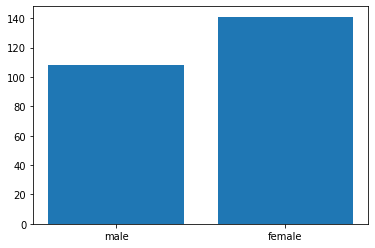

In [77]:
#comparision of number of male and female who get storke.
males=pos_stroke[pos_stroke['gender']==1]
females=pos_stroke[pos_stroke['gender']==0]
plt.bar(['male','female'],[len(males),len(females)])

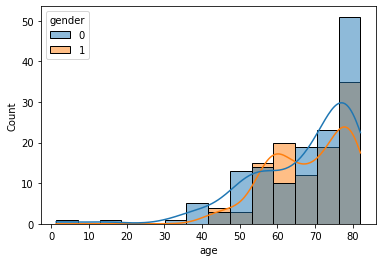

In [89]:
#age distribution of males and females who got stroke.
#We can see that the data distribution of males is bimodal while for females it seems unimodal.
#we can also see the probability of heart stroke increases after 40 in females and after 50 in males.
sns.histplot(data=pos_stroke,x='age',hue="gender",kde=True)

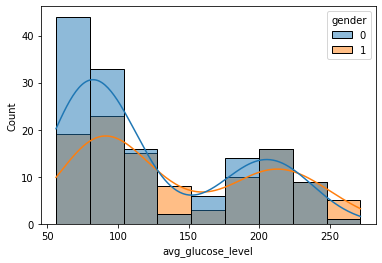

In [92]:
#avg_glucose_level distribution.
#It can be seen that if glucose level is too low or quite high the chances of heart rate increases.
#The above point is valid for both male and females.
sns.histplot(data=pos_stroke,x='avg_glucose_level',hue='gender',kde=True)

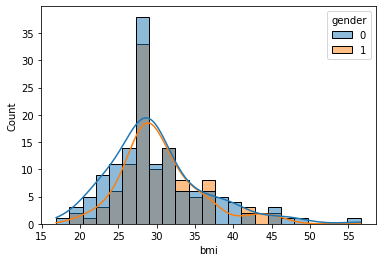

In [94]:
#bmi distribution.
#The distributions are almost similar to males and females.
#if the BMI if the body is 27-30 the chances of stroke increases.
sns.histplot(data=pos_stroke,x='bmi',hue='gender',kde=True)

<BarContainer object of 2 artists>

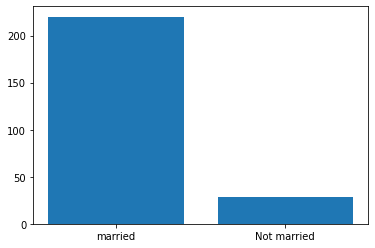

In [97]:
#effect of marriage on heart stroke.
#married people have high risk of stroke.
plt.bar(['married',"Not married"],[len(pos_stroke[pos_stroke['ever_married']==1]), len(pos_stroke[pos_stroke['ever_married']==0])])

In [107]:
#training a neural network for predictions.
#Random splitting of data of into train and test into ratio of 8:2.
train_data=data.sample(frac=0.80)
test_data=data.drop(train_data.index)

In [110]:
train_labels=train_data['stroke']
train_data=train_data.drop('stroke',axis=1)
test_labels=test_data['stroke']
test_data=test_data.drop('stroke',axis=1)

In [125]:
#SVM classifier.
from sklearn import svm
clf=svm.SVC()
clf.fit(train_data,train_labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
pred_val=clf.predict(test_data)
acc=sklearn.metrics.accuracy_score(test_labels,pred_val)
acc

0.9481409001956947

In [129]:
#MLP
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(train_data,train_labels)
acc=sklearn.metrics.accuracy_score(test_labels,clf.predict(test_data))
acc


0.9471624266144814

In [130]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_data, train_labels)
acc=sklearn.metrics.accuracy_score(test_labels,neigh.predict(test_data))
acc

0.9432485322896281

In [131]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(train_data,train_labels)
acc=sklearn.metrics.accuracy_score(test_labels,clf.predict(test_data))
acc

0.9481409001956947

In [132]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_data,train_labels)
acc=sklearn.metrics.accuracy_score(test_labels,clf.predict(test_data))
acc

0.9021526418786693